<a href="https://colab.research.google.com/github/Nwohalucy/Hello-world/blob/master/module_1_mini_project(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Perform Multiple Linear Regression

## Overview
This project focuses on using multiple linear regression to analyze the relationship between sales and various marketing promotion strategies. By leveraging multiple independent variables, such as TV, social media, radio, and influencer promotions, we aim to build a predictive model that estimates sales based on these factors. This project will cover the complete data science pipeline, including data exploration, preprocessing, model building, evaluation, and interpretation.

## Objective
Develop a multiple linear regression model to predict sales based on marketing promotion data. The project will involve exploring the dataset, selecting relevant independent variables, fitting the model, checking assumptions, and interpreting the results to provide actionable insights.

## Learning Outcomes
1. Understand the concept of multiple linear regression and its applications.
2. Learn to preprocess and explore data for regression analysis.
3. Gain experience in fitting and evaluating a multiple linear regression model.
4. Check and validate regression assumptions.
5. Interpret model coefficients and communicate results to stakeholders.

---


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. The goal is to predict sales based on various marketing promotion strategies, which can help the business optimize its marketing efforts and allocate resources effectively.

### Mini-task:
Write a brief paragraph on how predicting sales using multiple linear regression can benefit the business.

---

Predicting Sales in this context using multiple Linear Regression enhances the possibility of having different factors that could lead to making a great sales for the company rather than using and/or depending only on one factor which may not be yeilding enough sales when compared to using multiple independent factors/variables.

## Step 2: Data Collection
### Task:
Collect the dataset required for building the regression model. The dataset used in this project is `marketing_sales_data.csv`, which contains information about TV, social media, radio, and influencer promotions, along with sales data.

### Mini-task:
Load the dataset and inspect the first few rows to understand its structure.

#### Hint:
Use the `pandas` library to load the dataset and display the first five rows.

```python
import pandas as pd

# Load the dataset
data = pd.read_csv('marketing_sales_data.csv')

# Display the first five rows
### YOUR CODE HERE ###
```

---

In [1]:
# Import Data Files from Google Drive

import requests
import pandas as pd
from io import StringIO
def read_gd(sharingurl):
    file_id = sharingurl.split('/')[-2]
    download_url='https://drive.google.com/uc?export=download&id=' + file_id
    url = requests.get(download_url).text
    csv_raw = StringIO(url)
    return csv_raw

url = "https://drive.google.com/file/d/1WChLou3qt_JaPjYLZBMHJ8WxSssQ-enL/view?usp=drive_link"
gdd = read_gd(url)

df = pd.read_csv(gdd)

df.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [2]:
df.rename(columns={'Social Media': 'Social_Media'}, inplace=True)
df.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [3]:
df.describe()

,Radio,Social_Media,Sales
count,572.000000,572.000000,572.000000
mean,17.520616,3.333803,189.296908
std,9.290933,2.238378,89.871581
min,0.109106,0.000031,33.509810
25%,10.699556,1.585549,118.718722
50%,17.149517,3.150111,184.005362
75%,24.606396,4.730408,264.500118
max,42.271579,11.403625,357.788195


## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the distribution of variables, identify relationships between variables, and prepare the data for modeling.

### Mini-task:
Create a pairplot to visualize the relationships between continuous variables in the dataset.

#### Hint:
Use `seaborn.pairplot()` to create a pairplot of the continuous variables.

```python
import seaborn as sns

# Create a pairplot of the continuous variables
### YOUR CODE HERE ###
```

---

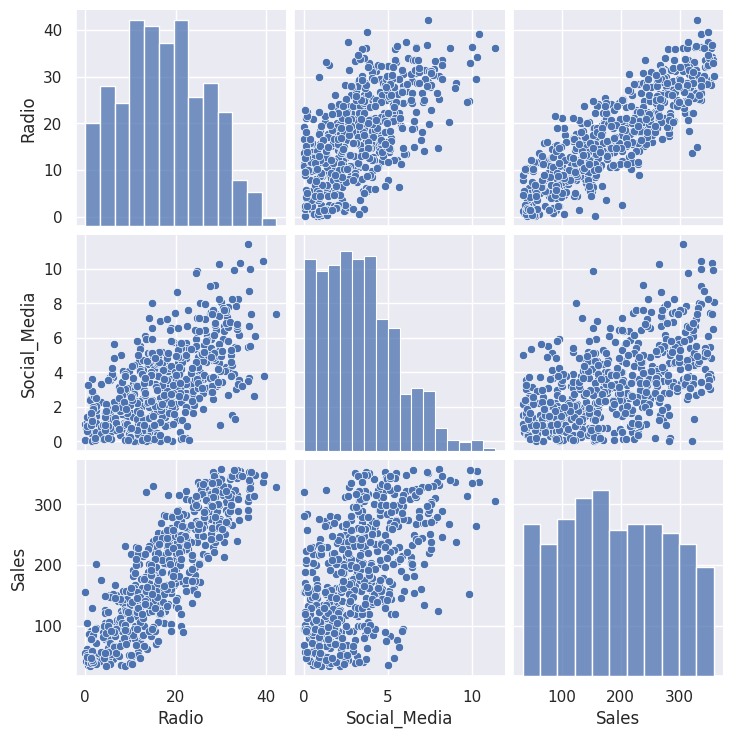

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.pairplot(df)


## Step 4: Data Preparation
### Task:
Prepare the data for regression analysis by handling missing values, encoding categorical variables, and splitting the data into training and testing sets.

### Mini-task:
Drop rows with missing values and encode categorical variables if necessary.

#### Hint:
Use `data.dropna()` to remove rows with missing values and `pd.get_dummies()` to encode categorical variables.

```python
# Drop rows with missing values
### YOUR CODE HERE ###

# Encode categorical variables (if needed)
### YOUR CODE HERE ###
```

---

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social_Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


In [7]:
# From the information section, we can see that there are two variable values with strings (objects). We will need to convert them the to integers,
# only then can their values be read by the OLS Model.

# Drop rows with missing values

df = df.dropna()
df.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [8]:
# Encode categorical variables

df = pd.get_dummies(df, columns=['TV', 'Influencer'], drop_first=True, dtype='int')
df.head()

,Radio,Social_Media,Sales,TV_Low,TV_Medium,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,3.518070,2.293790,55.261284,1,0,0,1,0
1,7.756876,2.572287,67.574904,1,0,1,0,0
2,20.348988,1.227180,272.250108,0,0,0,1,0
3,20.108487,2.728374,195.102176,0,1,1,0,0
4,31.653200,7.776978,273.960377,0,0,0,0,1


In [9]:
# We have to map out the X and the y

import statsmodels.api as sm

X = df.drop('Sales', axis=1)
X = sm.add_constant(X)
y = df['Sales']
X

,const,Radio,Social_Media,TV_Low,TV_Medium,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,1.0,3.518070,2.293790,1,0,0,1,0
1,1.0,7.756876,2.572287,1,0,1,0,0
2,1.0,20.348988,1.227180,0,0,0,1,0
3,1.0,20.108487,2.728374,0,1,1,0,0
4,1.0,31.653200,7.776978,0,0,0,0,1
...,...,...,...,...,...,...,...,...
567,1.0,14.656633,3.817980,0,1,0,1,0
568,1.0,28.110171,7.358169,0,0,1,0,0
569,1.0,11.401084,5.818697,0,1,0,0,1
570,1.0,21.119991,5.703028,0,1,0,0,0


In [10]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.        , -1.50843863, -0.46503463, ..., -0.56119741,
         1.66975431, -0.61507175],
       [ 0.        , -1.0518089 , -0.34050683, ...,  1.78190417,
        -0.5988905 , -0.61507175],
       [ 0.        ,  0.30468926, -0.94196181, ..., -0.56119741,
         1.66975431, -0.61507175],
       ...,
       [ 0.        , -0.65923281,  1.11110281, ..., -0.56119741,
        -0.5988905 ,  1.62582659],
       [ 0.        ,  0.3877464 ,  1.05938243, ..., -0.56119741,
        -0.5988905 , -0.61507175],
       [ 0.        , -0.46315496,  0.14610968, ..., -0.56119741,
         1.66975431, -0.61507175]])

## Step 5: Model Building
### Task:
Fit a multiple linear regression model to predict sales using the selected independent variables.

### Mini-task:
Define the OLS formula and fit the model using the `statsmodels` library.

#### Hint:
Use `statsmodels.formula.api.ols()` to define the model and fit it to the data.

```python
import statsmodels.formula.api as smf

# Define the OLS formula
### YOUR CODE HERE ###

# Fit the model
### YOUR CODE HERE ###

# Display the model summary
### YOUR CODE HERE ###
```

---

In [12]:
import statsmodels.formula.api as smf

# Define the OLS formula
model = smf.ols(formula='Sales ~ Radio + Social_Media + TV_Low +	TV_Medium +	Influencer_Mega +	Influencer_Micro +	Influencer_Nano', data=df)

# Fit the model
result = model.fit()

# Display the model summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        11:05:18   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          217.4784      6.584  

## Step 6: Model Evaluation
### Task:
Evaluate the model by checking the regression assumptions, including linearity, independence, normality, constant variance, and multicollinearity.

### Mini-task:
Create scatterplots to check the linearity assumption and calculate the residuals to check the normality assumption.

#### Hint:
Use `seaborn.scatterplot()` to create scatterplots and `statsmodels.qqplot()` to check the normality of residuals.

```python
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Create scatterplots for linearity
### YOUR CODE HERE ###

# Calculate residuals and create a Q-Q plot
### YOUR CODE HERE ###
```

---

[]

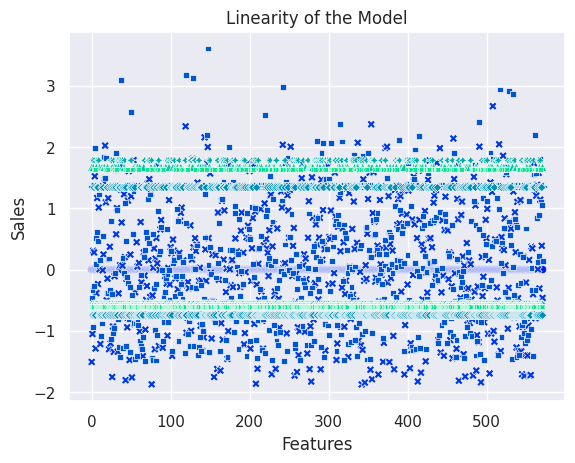

In [13]:
sns.scatterplot(X, palette='winter', legend=False)
plt.title('Linearity of the Model')
plt.xlabel('Features')
plt.ylabel('Sales')
plt.plot()

[]

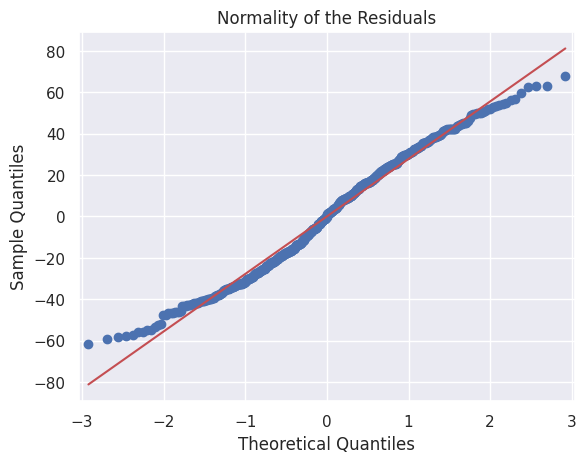

In [14]:
import statsmodels.api as sm

residuals = result.resid
sm.qqplot(residuals, line='s')
plt.title('Normality of the Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.plot()

[]

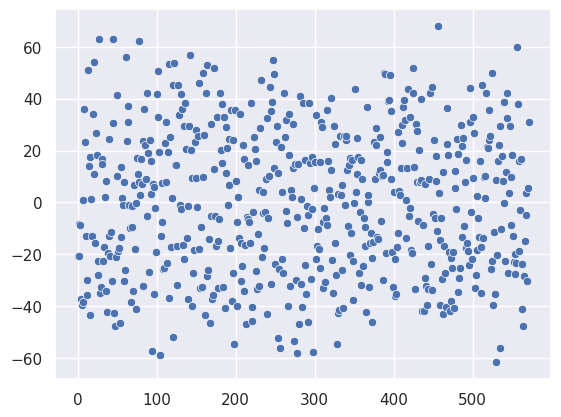

In [15]:
sns.scatterplot(residuals)
plt.plot()


## Step 7: Results and Interpretation
### Task:
Interpret the model results, including the R-squared value, coefficients, and their statistical significance.

### Mini-task:
Display the model summary and interpret the coefficients.

#### Hint:
Use `model.summary()` to display the model results and interpret the coefficients.

```python
# Display the model summary
### YOUR CODE HERE ###

# Interpret the coefficients
### YOUR CODE HERE ###
```

---

In [16]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     760.4
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          1.82e-282
Time:                        11:06:34   Log-Likelihood:                -2713.4
No. Observations:                 572   AIC:                             5443.
Df Residuals:                     564   BIC:                             5478.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          217.4784      6.584  

In [ ]:
                                ### Interpretation of the Coefficient

### A positive coefficient as seen in  i) Influencer_Mega[T.True], Influencer_Micro[T.True], Influencer_Nano[T.True], and
### Radio indicates that more Influencer adverts and Radio Ads will mostly increase Sales than other variables.

### Again, adding Radio and Social_Media will help to refine our model.



## Considerations
**What are some key takeaways you learned from this project?**
- Reflect on the importance of checking regression assumptions and interpreting model coefficients.
- Consider how the model's insights can be used to optimize marketing strategies.

**How would you share your findings with a team?**
- Prepare a presentation with visualizations and key metrics.
- Discuss the impact of different marketing strategies on sales.

**What would you share with and recommend to stakeholders?**
- Highlight the key factors that contribute most to sales.
- Recommend strategies to optimize marketing efforts based on the model's insights.

From the summary section, the Radio advert has the best Sales strategy as can be seen from the summary to have a coefficent of 2.9735  and TV_Micro with a coefficient of 2.9391